In [38]:
# this script analyzes inundation extents and relates them to water levels at Koh Khel 

# source of inundation extents: 
# https://code.earthengine.google.com/481fb071227d0744514220446ed1e0e8
# https://code.earthengine.google.com/b52282eb75b389feb235b6ff3913a402


In [39]:
# import necessary packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import datetime
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import math
from matplotlib.dates import date2num

In [40]:
# standardise water level data at Koh Kehl 

## import, convert datetime, drop unnecessary columns
wl_long = pd.read_csv('wl_KK.csv')
wl_long['date'] = pd.to_datetime(wl_long['date'])
wl_long['date'] = wl_long['date'].dt.strftime('%Y-%m-%d')
wl_long.columns = ['huh', 'date', 'wl_long']
wl_long = wl_long.drop(columns=['huh'])
wl_long = wl_long.set_index('date')
wl_long['wl_long'] = wl_long['wl_long']-1 # <------ -1 correct for elevation 

# standardise to daily 
wl_long.index = pd.to_datetime(wl_long.index)
wl_long1 = wl_long.resample('d').mean()
wl_KK_daily = wl_long1  
wl_KK_daily.columns = ['wl_KK']

# calculate rolling mean of 3 days 
wl_KK_daily = wl_KK_daily.rolling(center=False, window=3, min_periods=1).mean().round(2)

wl_KK_daily.tail()

,wl_KK
date,
2021-03-18,1.01
2021-03-19,1.00
2021-03-20,0.99
2021-03-21,0.97
2021-03-22,0.97


In [41]:
# Zone 2C

opticalfilename = 'MODIS_Flooded_Areas_2C.csv'  

## optical data 

op =pd.read_csv(opticalfilename)

op['date'] = pd.to_datetime(op['date'])

minimum_area = op['totalarea'].max()*0.95

op = op[op['totalarea'] > minimum_area]

op['flooded'] = 100*(op['flood']/op['totalarea'])
op = op.drop(columns=['system:index', 'dry', 'flood', 'totalarea', '.geo'])
op = op.set_index('date')
op.columns = ['flood_optical']

flood = op.merge(wl_KK_daily, how="inner", left_index=True, right_index=True)
flood.to_csv('MODIS_LINK_2C.csv')
flood = op.merge(wl_KK_daily, how="outer", left_index=True, right_index=True)
flood['date'] = flood.index
flood = flood[(flood['date']>'2000-01-01')]
flood.head()


,flood_optical,wl_KK,date
date,,,
2000-01-02,NaN,3.57,2000-01-02
2000-01-03,NaN,3.50,2000-01-03
2000-01-04,NaN,3.45,2000-01-04
2000-01-05,NaN,3.40,2000-01-05
2000-01-06,NaN,3.35,2000-01-06


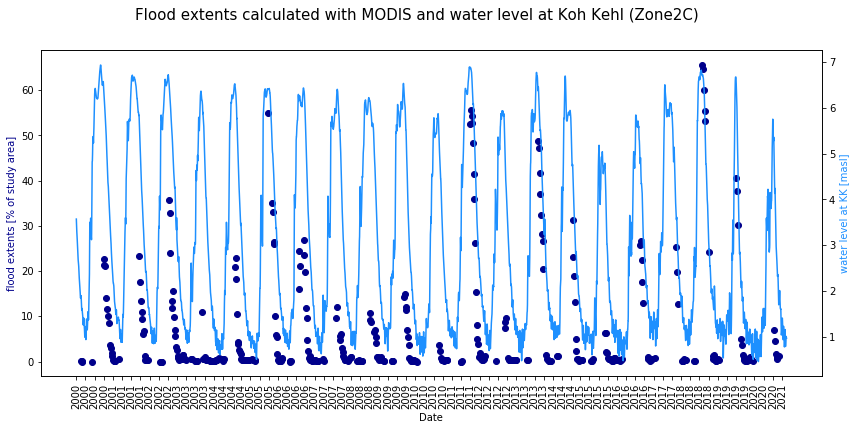

In [42]:
# visualise: 

# Initialise the figure and axes.

fig, ax1 = plt.subplots(1, figsize=(14, 6))

# Set the title for the figure
fig.suptitle('Flood extents calculated with MODIS and water level at Koh Kehl (Zone2C) ', fontsize=15)


# define axes 
y1 = flood['flood_optical']
y2 = flood['wl_KK']

#x = flood_daily.index
x = date2num(pd.to_datetime(flood.index))

ax2 = ax1.twinx()
ax1.scatter(x, y1, color="darkblue", label="flood extents")
ax2.plot(x, y2, color="dodgerblue", label="water level at KK")

#plt.legend(loc="upper left", title="Legend ", frameon=False)
#ax2.legend(loc=0)
#ax1.legend(loc=1)

#plt.xticks(rotation = 45)

ax1.set_xlabel('Date')
ax1.set_ylabel('flood extents [% of study area]', color='darkblue')
ax2.set_ylabel('water level at KK [masl]', color='dodgerblue')


axes = plt.gca()
ax.xaxis_date()
myFmt = mdates.DateFormatter('%Y')

ax1.xaxis.set_major_formatter(myFmt)

plt.xticks(np.arange(min(x), max(x), 100.0))


plt.setp( ax1.xaxis.get_majorticklabels(), rotation=90 )

fig.savefig('MODIS_KK_Relation_2C', dpi=300)


plt.show()

In [43]:
# Zone 2C

opticalfilename = 'MODIS_Flooded_Areas_PA.csv'  

## optical data 

op =pd.read_csv(opticalfilename)

op['date'] = pd.to_datetime(op['date'])

minimum_area = op['totalarea'].max()*0.95

op = op[op['totalarea'] > minimum_area]

op['flooded'] = 100*(op['flood']/op['totalarea'])
op = op.drop(columns=['system:index', 'dry', 'flood', 'totalarea', '.geo'])
op = op.set_index('date')
op.columns = ['flood_optical']

flood = op.merge(wl_KK_daily, how="inner", left_index=True, right_index=True)
flood.to_csv('MODIS_LINK_PA.csv')
flood = op.merge(wl_KK_daily, how="outer", left_index=True, right_index=True)
flood['date'] = flood.index
flood = flood[(flood['date']>'2000-01-01')]
flood.head()



,flood_optical,wl_KK,date
date,,,
2000-01-02,NaN,3.57,2000-01-02
2000-01-03,NaN,3.50,2000-01-03
2000-01-04,NaN,3.45,2000-01-04
2000-01-05,NaN,3.40,2000-01-05
2000-01-06,NaN,3.35,2000-01-06


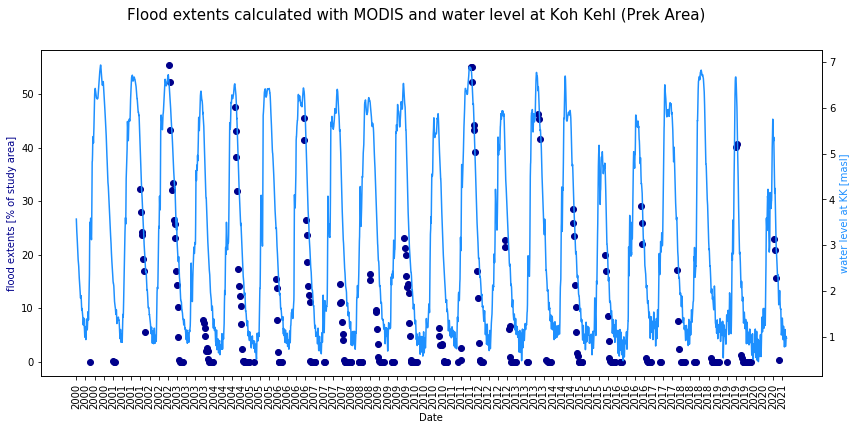

In [44]:
# visualise: 

# Initialise the figure and axes.

fig, ax1 = plt.subplots(1, figsize=(14, 6))

# Set the title for the figure
fig.suptitle('Flood extents calculated with MODIS and water level at Koh Kehl (Prek Area) ', fontsize=15)



# define axes 
y1 = flood['flood_optical']
y2 = flood['wl_KK']

#x = flood_daily.index
x = date2num(pd.to_datetime(flood.index))

ax2 = ax1.twinx()
ax1.scatter(x, y1, color="darkblue", label="flood extents")
ax2.plot(x, y2, color="dodgerblue", label="water level at KK")

#plt.legend(loc="upper left", title="Legend ", frameon=False)
#ax2.legend(loc=0)
#ax1.legend(loc=1)

#plt.xticks(rotation = 45)

ax1.set_xlabel('Date')
ax1.set_ylabel('flood extents [% of study area]', color='darkblue')
ax2.set_ylabel('water level at KK [masl]', color='dodgerblue')


axes = plt.gca()
ax.xaxis_date()
myFmt = mdates.DateFormatter('%Y')

ax1.xaxis.set_major_formatter(myFmt)

plt.xticks(np.arange(min(x), max(x), 100.0))


plt.setp( ax1.xaxis.get_majorticklabels(), rotation=90 )

fig.savefig('MODIS_KK_Relation_PA', dpi=300)


plt.show()